In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv('loan.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Since this is resulting in a warning (not exactly an error), let's re-import the dataset again - now with the parameter 'low_memory' set to True. We do this just to be on the safer side. 

In [3]:
loan = pd.read_csv('loan.csv', low_memory=True)

This time it imports without throwing any apparent warning. <br>
With the import successfully done, let us know dive in into Data Understanding. 

# Data Understanding

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(39717, 111)

So, we have 39,717 rows & 111 columns (or attributes) in our loan dataset! <br>
Let's understand a little more about the dataset's columns.

In [6]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


loan.info() doesn't result in an output, since the information is too huge to be displayed. Let's continue with our data understanding. 

In [8]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [9]:
# summarising number of missing values for columns

loan.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
# percentage of missing values

round(loan.isnull().sum()/len(loan.index),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [11]:
# removing the columns having more than 90% missing values

missing_values_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
missing_values_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [12]:
loan= loan.drop(missing_values_columns, axis=1)

With all these columns dropped, let's check the new shape of our loan dataset. 

In [13]:
loan.shape

(39717, 55)

We are now left with 39,717 rows & 55 columns.

In [14]:
# summarize the mssing values again

100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


These are the columns, still having missing values: <br>
   Column Name                 :      Percentage of Missing Values
1. emp_title                   :                 6.19              <br> 
2. emp_length                  :                 2.70              <br>
3. desc                        :                 32.58             <br>
4. title                       :                 0.02              <br>
5. mths_since_last_delinq.     :                 64.66             <br>
6. revol_util                  :                 0.12              <br>
7. last_pymnt_d                :                 0.17              <br>
8. last_credit_pull_d          :                 ~0.01             <br>
9. collections_12_mths_ex_med  :                 0.14              <br>
10. chargeoff_within_12_mths.  :                 0.14              <br>
11. pub_rec_bankruptcies       :                 1.75              <br>
12. tax_liens                  :                 0.98              

Let's try to understand the values in these columns. 

In [15]:
loan[['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']]

,emp_title,emp_length,desc,title,mths_since_last_delinq,revol_util,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,NaN,83.70%,Jan-15,May-16,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,NaN,9.40%,Apr-13,Sep-13,0.0,0.0,0.0,0.0
2,NaN,10+ years,NaN,real estate business,NaN,98.50%,Jun-14,May-16,0.0,0.0,0.0,0.0
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,personel,35.0,21%,Jan-15,Apr-16,0.0,0.0,0.0,0.0
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,Personal,38.0,53.90%,May-16,May-16,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39712,FiSite Research,4 years,Our current gutter system on our home is old a...,Home Improvement,0.0,13.10%,Jul-10,Jun-10,NaN,NaN,NaN,NaN
39713,"Squarewave Solutions, Ltd.",3 years,The rate of interest and fees incurred by carr...,Retiring credit card debt,5.0,26.90%,Jul-10,Jul-10,NaN,NaN,NaN,NaN
39714,NaN,< 1 year,NaN,MBA Loan Consolidation,0.0,19.40%,Apr-08,Jun-07,NaN,NaN,NaN,NaN
39715,NaN,< 1 year,NaN,JAL Loan,0.0,0.70%,Jan-08,Jun-07,NaN,NaN,NaN,NaN


As a first measure, let's first drop columns we don't need to proceed with our analysis. <br>
1. emp_title doesn't offer much insight into the possibility of a borrower defaulting. We can safely drop that. <br>
2. desc might have given certain useful insights, but that would steer us towards the text mining domain. Since that is soemthing we don't wish to dwell in for now, we can proceed to drop that as well. <br>
3. title is a borrower filled column, & would surely not consist of any standarized values. That makes it harder for us to draw an inference with solid conviction. For instance, someone might fill in 'MBA loan' & other might key in 'MS loan' when actually for us both are simply educational loans. Too many discrete combinations - we drop it.
3. mths_since_last_delinq looks promising criteria for evaluation, as it can give an overview of how punctually the borrower has paid in the past. But since over 65% of these values stand missing & it is not something we can impute without stirring up obvious errors, we decide to drop it. <br>
4. last_credit_pull_d doesn't offer any possibility of insight into loan default tendency of the borrower. We drop it. <br>
4. last_pymnt_d, collections_12_mths_ex_med & chargeoff_within_12_mths are customer behaviour attributes, tracked by LendingClub once the loan stands issued. Thus, these are not of our concern. We can drop them. 

In [16]:
loan=loan.drop(['emp_title', 'desc','title', 'mths_since_last_delinq', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths'], axis=1)

Let's check out the state of our updated dataset. 

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [18]:
# finding the updated state of percentage missing values for each column
100*(loan.isnull().sum()/len(loan.index))

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
pymnt_plan                 0.000000
url                        0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

emp_length, revol_util, pub_rec_bankruptcies & tax_liens appear as promising candidates for our analysis. Since the percentage of missing values in these columns is very low, we proceed to drop the rows having NaN values (for these attributes/columns). 

In [19]:
loan=loan[~loan['emp_length'].isnull()]

In [20]:
loan=loan[~loan['revol_util'].isnull()]

In [21]:
loan=loan[~loan['pub_rec_bankruptcies'].isnull()]

In [22]:
loan=loan[~loan['tax_liens'].isnull()]

Let's redo our missing values check!

In [23]:
# finding the updated state of percentage missing values for each column
100*(loan.isnull().sum()/len(loan.index))

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prnc

Great! Now we have a fully intact dataset to work on, without missing value loopholes. <br>
All we are left to do is now, to drop all those columns (or attributes) that aren't relevant to our loan default tendency analysis. We proceed to do that.  

In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37898 entries, 0 to 39680
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37898 non-null  int64  
 1   member_id                37898 non-null  int64  
 2   loan_amnt                37898 non-null  int64  
 3   funded_amnt              37898 non-null  int64  
 4   funded_amnt_inv          37898 non-null  float64
 5   term                     37898 non-null  object 
 6   int_rate                 37898 non-null  object 
 7   installment              37898 non-null  float64
 8   grade                    37898 non-null  object 
 9   sub_grade                37898 non-null  object 
 10  emp_length               37898 non-null  object 
 11  home_ownership           37898 non-null  object 
 12  annual_inc               37898 non-null  float64
 13  verification_status      37898 non-null  object 
 14  issue_d               

These columns fit our mark: <br>
1. id
2. member_id
3. pymnt_plan^
4. url
5. zip_code
6. earliest_cr_line
7. total_acc
8. initial_list_status
9. out_prncp^
10. out_prncp_inv^
11. total_pymnt^
12. total_pymnt_inv^
13. total_rec_prncp^
14. total_rec_int^
15. total_rec_late_fee^
16. recoveries^
17. collection_recovery_fee^
18. last_pymnt_amnt^
19. policy_code <br> 
    ^ = customer behaviour parameters, recorded <b>post</b> issuance of loan

In [25]:
irrelevant_cols = ['id', 'member_id', 'pymnt_plan', 'url', 'zip_code', 'earliest_cr_line', 'total_acc', 'initial_list_status', 
                  'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
                  'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code']


In [26]:
loan.drop( irrelevant_cols, axis=1, inplace=True)

Let's view the update state of our loan dataset, now with all these columns dropped. 

In [27]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37898 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37898 non-null  int64  
 1   funded_amnt           37898 non-null  int64  
 2   funded_amnt_inv       37898 non-null  float64
 3   term                  37898 non-null  object 
 4   int_rate              37898 non-null  object 
 5   installment           37898 non-null  float64
 6   grade                 37898 non-null  object 
 7   sub_grade             37898 non-null  object 
 8   emp_length            37898 non-null  object 
 9   home_ownership        37898 non-null  object 
 10  annual_inc            37898 non-null  float64
 11  verification_status   37898 non-null  object 
 12  issue_d               37898 non-null  object 
 13  loan_status           37898 non-null  object 
 14  purpose               37898 non-null  object 
 15  addr_state         

We shall now be performing some ending note analyses on the dataset to weed out redundant & non-informational attributes/columns. <br>
Prima facie, <i>loan_amnt</i>, <i>funded_amnt</i> & <i>funded_amnt_inv</i> catches our attention. Let's investigate. 

Referring to the data dictionary, we find the meaning of <i>funded_amnt_inv</i> mentioned as "The total amount committed by investors for that loan at that point in time". This appears to be a post approval metric (why would investors even quote a number if the borrower is flagged as risky by LendingClub engine). We can drop that. 

In [28]:
loan.drop(['funded_amnt_inv'], axis=1, inplace=True)

Further investigating into the values present in <i>loan_amnt</i> & <i>funded_amnt_inv</i> columns, we find that same (duplicated) values are present in both. Proof of which is presented below:

In [29]:
# creating a column 'same' that is populated with the value 1 only if value['loan_amnt']==value['funded_amnt'] (else 0)
loan['same'] = loan.apply(lambda x : 1 if x['loan_amnt'] == x['funded_amnt'] else 0, axis=1)

In [30]:
# counting the number of rows in which values are same for both the 'loan_amnt' &'funded_amnt' columns
loan['same'].count()

37898

37,898 rows have the same (duplicated) values. 

In [31]:
loan.shape

(37898, 28)

Clearly, all rows are filled with the same value for 'loan_amnt' & 'funded_amnt' attributes. This is an instance of redundancy. We can safely proceed to drop off 'funded_amnt' column from our dataset. Additionally we also drop our user defined 'same' column. 

In [32]:
loan.drop(['funded_amnt', 'same'], axis=1, inplace=True)

In order to weed out non-informational columns, let us proceed by finding count of unique values present in each column of our loan dataset. 

In [33]:
loan.nunique()

loan_amnt                 869
term                        2
int_rate                  337
installment             14736
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              4
annual_inc               5032
verification_status         3
issue_d                    52
loan_status                 3
purpose                    14
addr_state                 49
dti                      2863
delinq_2yrs                11
inq_last_6mths              9
open_acc                   38
pub_rec                     5
revol_bal               21212
revol_util               1087
application_type            1
acc_now_delinq              1
delinq_amnt                 1
pub_rec_bankruptcies        3
tax_liens                   1
dtype: int64

Let's drop all columns with count of unique values as 1. With just one unique value present in these columns, drawing conclusions isn't feasible (w.r.t that particular attribute). 

In [34]:
loan.drop(['application_type', 'acc_now_delinq', 'delinq_amnt', 'tax_liens'], axis=1, inplace=True)

Verifying whether all such columns with just one unique value stand dropped. 

In [35]:
loan.nunique()

loan_amnt                 869
term                        2
int_rate                  337
installment             14736
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              4
annual_inc               5032
verification_status         3
issue_d                    52
loan_status                 3
purpose                    14
addr_state                 49
dti                      2863
delinq_2yrs                11
inq_last_6mths              9
open_acc                   38
pub_rec                     5
revol_bal               21212
revol_util               1087
pub_rec_bankruptcies        3
dtype: int64

Great! Now let's continue with our cleanup. 

In [36]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37898 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37898 non-null  int64  
 1   term                  37898 non-null  object 
 2   int_rate              37898 non-null  object 
 3   installment           37898 non-null  float64
 4   grade                 37898 non-null  object 
 5   sub_grade             37898 non-null  object 
 6   emp_length            37898 non-null  object 
 7   home_ownership        37898 non-null  object 
 8   annual_inc            37898 non-null  float64
 9   verification_status   37898 non-null  object 
 10  issue_d               37898 non-null  object 
 11  loan_status           37898 non-null  object 
 12  purpose               37898 non-null  object 
 13  addr_state            37898 non-null  object 
 14  dti                   37898 non-null  float64
 15  delinq_2yrs        

In [37]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,car,GA,1.00,0,5,3,0,1687,9.40%,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,small_business,IL,8.72,0,2,2,0,2956,98.50%,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,other,CA,20.00,0,1,10,0,5598,21%,0.0
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,other,OR,17.94,0,0,15,0,27783,53.90%,0.0


Clearly, the following columns are expected to be numeric: <br>
1. term
2. int_rate
3. emp_length
4. revol_util <br>
But a quick glance through our loan.info() reveals all of these are of type 'object' in our dataset. <br>
We endeavour to now convert these into numeric values. 

In [38]:
# converting 'term' into int
loan['term'] = loan.apply(lambda x: int(x['term'].split()[0]), axis=1)

In [39]:
# converting 'int_rate' into float
loan['int_rate'] = loan.apply(lambda x: float(x['int_rate'].replace('%','')), axis=1)

In [40]:
# converting 'emp_length' into int
loan['emp_length']=loan['emp_length'].apply(lambda x: x.replace('+','').replace('<','').strip())
loan['emp_length']=loan.apply(lambda x: int(x['emp_length'].split()[0]), axis=1)

In [41]:
# converting 'revol_util' into float
loan['revol_util'] = loan.apply(lambda x: str(x['revol_util']), axis=1)
loan['revol_util'] = loan.apply(lambda x: float(x['revol_util'].replace('%','')), axis=1)

Now let's do a loan.info() to view our dataset status & decide on further points of action 

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37898 entries, 0 to 39680
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37898 non-null  int64  
 1   term                  37898 non-null  int64  
 2   int_rate              37898 non-null  float64
 3   installment           37898 non-null  float64
 4   grade                 37898 non-null  object 
 5   sub_grade             37898 non-null  object 
 6   emp_length            37898 non-null  int64  
 7   home_ownership        37898 non-null  object 
 8   annual_inc            37898 non-null  float64
 9   verification_status   37898 non-null  object 
 10  issue_d               37898 non-null  object 
 11  loan_status           37898 non-null  object 
 12  purpose               37898 non-null  object 
 13  addr_state            37898 non-null  object 
 14  dti                   37898 non-null  float64
 15  delinq_2yrs        

In [43]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,...,credit_card,AZ,27.65,0,1,3,0,13648,83.7,0.0
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,...,car,GA,1.00,0,5,3,0,1687,9.4,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,small_business,IL,8.72,0,2,2,0,2956,98.5,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,other,CA,20.00,0,1,10,0,5598,21.0,0.0
4,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,...,other,OR,17.94,0,0,15,0,27783,53.9,0.0


In [44]:
loan.nunique()

loan_amnt                 869
term                        2
int_rate                  337
installment             14736
grade                       7
sub_grade                  35
emp_length                 10
home_ownership              4
annual_inc               5032
verification_status         3
issue_d                    52
loan_status                 3
purpose                    14
addr_state                 49
dti                      2863
delinq_2yrs                11
inq_last_6mths              9
open_acc                   38
pub_rec                     5
revol_bal               21212
revol_util               1087
pub_rec_bankruptcies        3
dtype: int64

Some pointers that come up upon viewing the data in cells 43 & 44 above:
1. 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti' & 'open_acc' have lot of discrete (unique) values in them. 
2. 'revol_bal' & 'revol_util' in itself doesn't present much value to our analysis. We need to find a way to create a separate column from them, that promises actionable information.
3. 'issue_d' column is rather non-informational in its current state. 
4. We need to decide on a target column (a column against which we can perform our analysis) <br>

Remedies we pursue:
1. We bin the values in all these columns. 
2. We shall create a separate column 'avl_revol_credit_balance', calculated as 'revol_bal'*(100-'revol_util')
3. 'issue_month' column shall be extracted from 'issue_d' column. Subsequently 'issue_d' column shall be dropped. 
4. We nominate 'loan_status' column to be the target column for this analysis. <br> <br>
Let's proceed step on step.

### 1. Binning the values

In [45]:
# bin for loan amount ('loan_amnt')

def loan_amount_bin(n):
    if n < 5000:
        return 'low'
    elif n >= 5000 and n < 15000:
        return 'medium'
    elif n>=15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
    
# bin for interest rate ('int_rate')

def int_rate_bin(n):
    if n < 10:
        return 'low'
    elif n >= 10 and n < 15:
        return 'medium'
    elif n>=15 and n < 20:
        return 'high'
    else:
        return 'very high'

# bin for installment ('installment')

def installment_bin(n):
    if n < 450:
        return 'low'
    elif n >= 450 and n < 900:
        return 'medium'
    else:
        return 'high'
    
# bin for annual income ('annual_inc')

def annual_income_bin(n):
    if n < 50000:
        return 'low'
    elif n >= 50000 and n < 250000:
        return 'medium'
    else:
        return 'high'

# bin for debt to installment ratio ('dti')

def dti_bin(n):
    if n < 10:
        return 'low'
    elif n >= 10 and n < 20:
        return 'medium'
    else:
        return 'high'

# bin for number of open credit line accounts ('open_acc')

def open_acc_bin(n):
    if n < 6:
        return 'low'
    elif n >= 6 and n < 12:
        return 'medium'
    else:
        return 'high'
    



In [46]:
loan['loan_amnt_bin'] = loan['loan_amnt'].apply(lambda x: loan_amount_bin(x))

In [47]:
loan['int_rate_bin'] = loan['int_rate'].apply(lambda x: int_rate_bin(x))

In [48]:
loan['installment_bin'] = loan['installment'].apply(lambda x: installment_bin(x))

In [49]:
loan['annual_income_bin'] = loan['annual_inc'].apply(lambda x: annual_income_bin(x))

In [50]:
loan['dti_bin'] = loan['dti'].apply(lambda x: dti_bin(x))

In [51]:
loan['open_acc_bin'] = loan['open_acc'].apply(lambda x: open_acc_bin(x))

### 2. Calculating 'avl_revol_credit_balance' attribute from 'revol_bal' & 'revol_util'

In [52]:
loan['avl_revol_credit_balance']=loan.apply(lambda x: x['revol_bal']*((100-x['revol_util'])/100), axis=1)

Clearly this attribute would also require binning. This is due to:

In [53]:
loan['avl_revol_credit_balance'].nunique()

36519

..the fact that 'avl_revol_credit_balance' possess over 36,000 unqiue values! <br>
We bin it we shall utlize its first (25th percentile) & third (75th percentile) quartile values. 

In [54]:
loan['avl_revol_credit_balance'].describe()

count     37898.000000
mean       5482.660724
std        7968.014187
min           0.000000
25%        1401.555000
50%        3371.785500
75%        6706.837500
max      149000.000000
Name: avl_revol_credit_balance, dtype: float64

So, the value at <br>
25th percentile is 1401.55 <br>
& at <br>
75th percentile is 6706.83

In [55]:
# binning 'avl_revol_credit_balance'
loan['avl_revol_credit_balance_bin']=loan.apply(lambda x: 'Low' if x['avl_revol_credit_balance']<=1401.55 else ('Medium' if x['avl_revol_credit_balance']>1401.55 and x['avl_revol_credit_balance']<6706.83 else 'High'), axis=1)

Let's drop the now redundant 'revol_bal' & 'revol_util' columns. 


In [56]:
loan.drop(['revol_bal', 'revol_util'], axis=1, inplace=True)

### 3. Extracting 'issue_month' column from 'issue_d' attribute

In [57]:
loan['issue_month']=loan.apply(lambda x: x['issue_d'].split('-')[0], axis=1)

In [58]:
# drop 'issue_d' column

In [59]:
loan.drop(['issue_d'], axis=1, inplace=True)

### 4. Setting up our target attribute, 'loan_status' for analysis <br>
We proceed by first dropping all rows with 'loan_status' set as 'Current', as these doesn't give us an opportunity to conclude whether the borrower has defaulted on the loan yet, or not. 

In [60]:
# dropping all rows with 'loan_status' set to 'Current' 
loan=loan[loan['loan_status'] != 'Current']

With this done, now we replace all cells with 'Fully Paid' values in the 'loan_status' column with 0, & all cells with 'Charged Off' as the value with 1. <br>Here 1 denotes that the borrower has defaulted. 

In [61]:
loan['loan_status'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

This concludes our data cleaning steps. <br>
Now let's move on to data analysis!

# Data Analysis

Let's begin with the most obvious question: 'Are LendingClub's borrowers even defaulting?'. <br>
Time to find out. 

In [62]:
# default rate
(round(np.mean(loan['loan_status']),2))*100

14.000000000000002

Uh-oh. Clearly, 14% of all approved borrowers on the LendingClub platform has shown a historical/continuing tendency to default. 

## Univariate Analysis

### 1. Analyzing/extracting insights through univariate plots, plotted against our target variable

In [63]:
# define function to plot loan_status (our target variable) across categorical variables
def plot_cat(cat_var, x_label, order=None):
    ax = sns.barplot(x= cat_var, y='loan_status', data=loan, order=order, ci=None)
    ax.set(xlabel=x_label, ylabel='Number of borrowers who defaulted')
    plt.show()

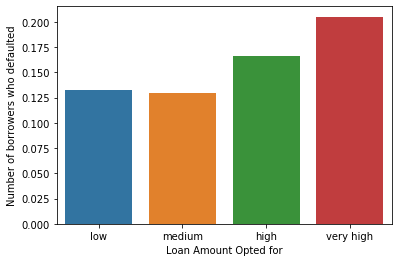

In [64]:
# against loan amount ('loan_amnt_bin')
plot_cat('loan_amnt_bin', 'Loan Amount Opted for', ['low', 'medium', 'high', 'very high'])

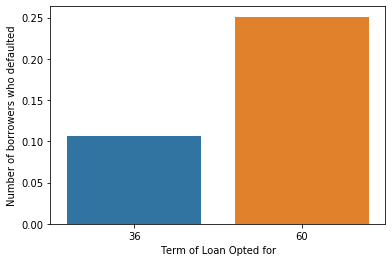

In [65]:
# against the term of loan ('term')
plot_cat('term', 'Term of Loan Opted for')

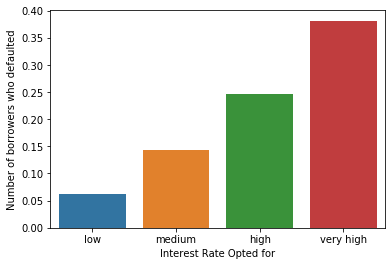

In [66]:
# against the interest rate opted for ('int_rate') 
plot_cat('int_rate_bin', 'Interest Rate Opted for', ['low', 'medium', 'high', 'very high'])

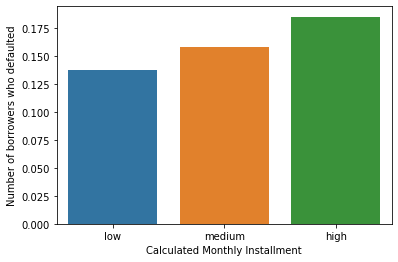

In [67]:
# against the installment calculated by LendingClub at the line of loan application ('installment_bin')
plot_cat('installment_bin', 'Calculated Monthly Installment', ['low', 'medium', 'high'])

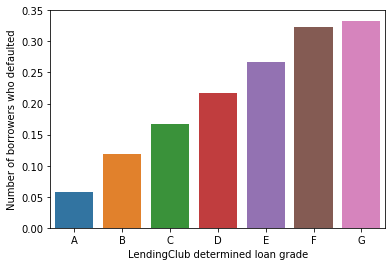

In [68]:
# against the loan grade (defined by Lending Club) ('grade')
plot_cat('grade', 'LendingClub determined loan grade', ['A','B','C','D','E','F','G'])

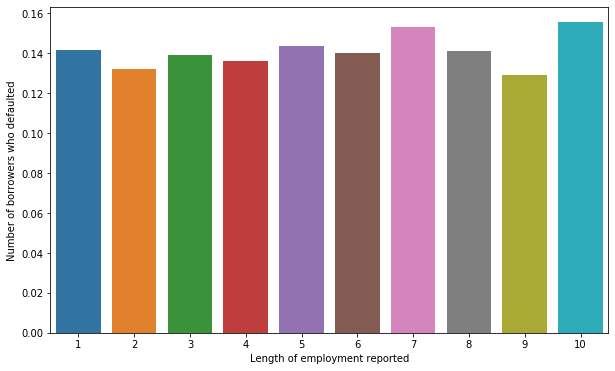

In [69]:
# against the length of employment reported by the borrower ('emp_length')
plt.figure(figsize=(10,6))
plot_cat('emp_length', 'Length of employment reported')

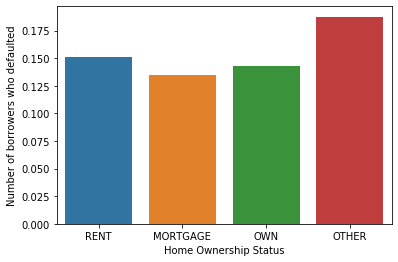

In [70]:
# against the home ownership status reported by the borrower ('home_ownership')
plot_cat('home_ownership', 'Home Ownership Status', order=['RENT', 'MORTGAGE', 'OWN', 'OTHER'])

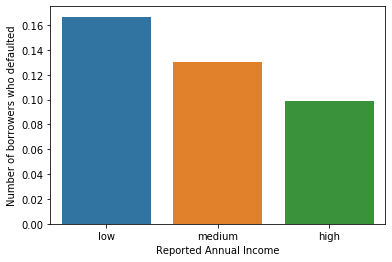

In [71]:
# against the annual income reported ('annual_inc_bin')
plot_cat('annual_income_bin', 'Reported Annual Income')

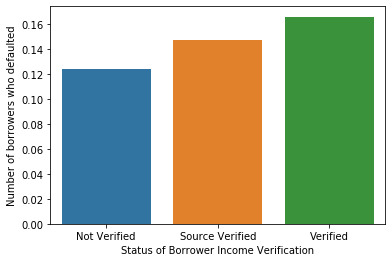

In [72]:
# against the income reported verification status ('verification_status')
plot_cat('verification_status', 'Status of Borrower Income Verification', order=['Not Verified', 'Source Verified', 'Verified'])

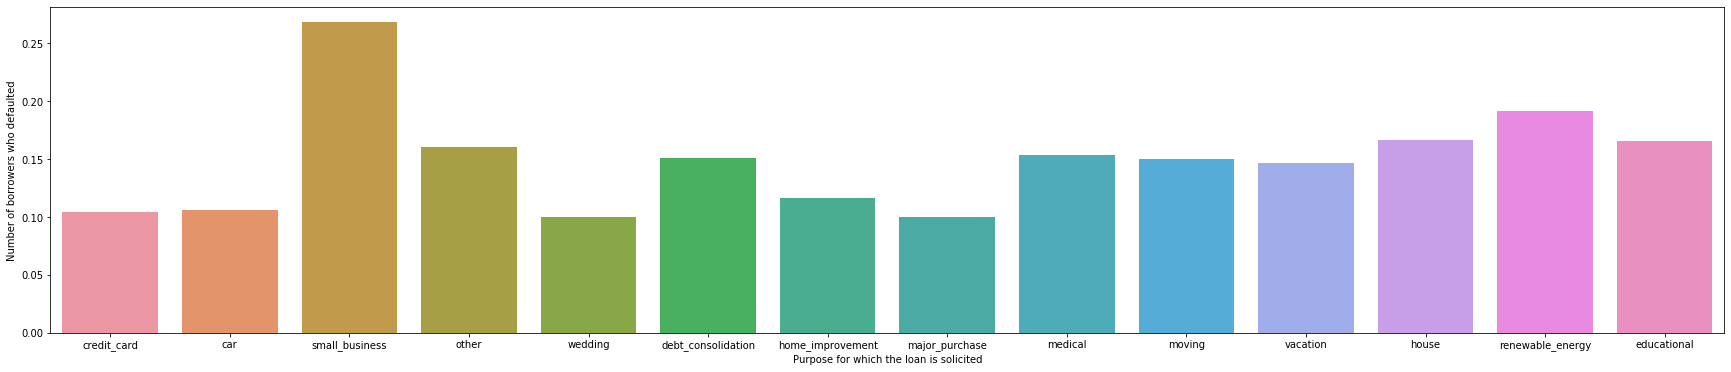

In [73]:
# against the purpose for which the loan is being solicited ('purpose')
plt.figure(figsize=(30,6))
plot_cat('purpose', 'Purpose for which the loan is solicited')

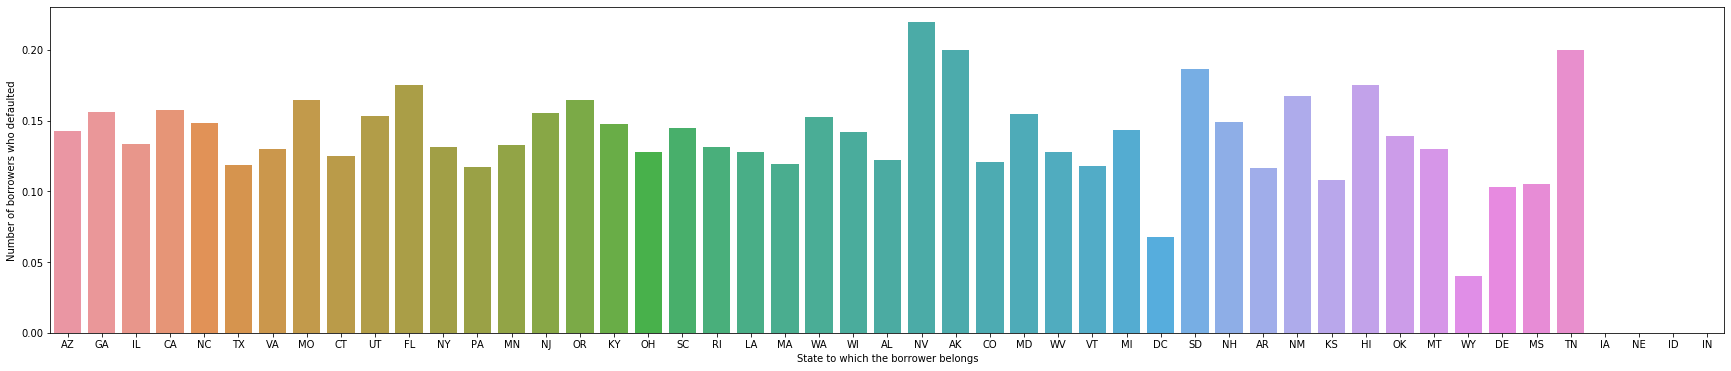

In [74]:
# against the state to which the borrower belongs ('addr_state')
plt.figure(figsize=(30,6))
plot_cat('addr_state', 'State to which the borrower belongs')

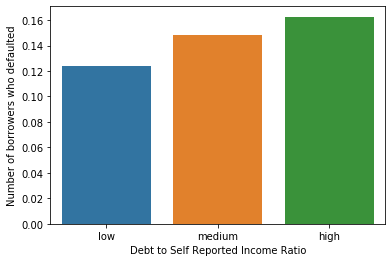

In [75]:
# against the debt to self reported income ratio ('dti_bin')
plot_cat('dti_bin', 'Debt to Self Reported Income Ratio', order=['low', 'medium', 'high'])

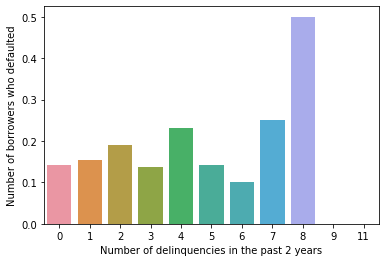

In [76]:
# against the number of delinquencies recorded for the borrower in the past 2 years ['delinq_2yrs']
plot_cat('delinq_2yrs', 'Number of delinquencies in the past 2 years')

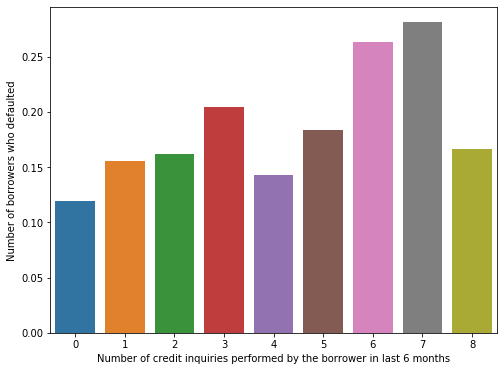

In [77]:
# against the number of loan/credit inquiries performed by the user in the last 6 months ['inq_last_6mths']
plt.figure(figsize=(8,6))
plot_cat('inq_last_6mths', 'Number of credit inquiries performed by the borrower in last 6 months')

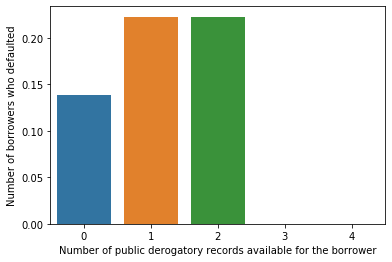

In [78]:
# against the number of available public derogatory records for the borrower ('pub_rec')
plot_cat('pub_rec', 'Number of public derogatory records available for the borrower')

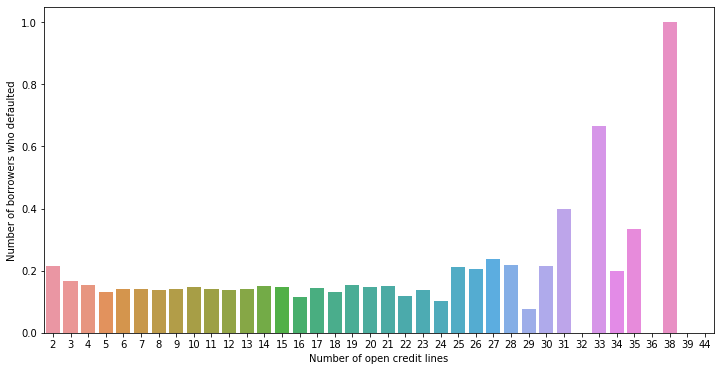

In [79]:
# against number of open credit lines available/registered for the user
plt.figure(figsize=(12,6))
plot_cat('open_acc', 'Number of open credit lines')

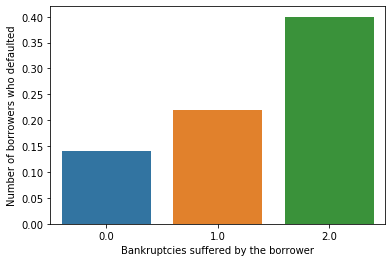

In [80]:
# against the number of bankruptcies suffered, as determined for the borrower ('pub_rec_bankruptcies')
plot_cat('pub_rec_bankruptcies', 'Bankruptcies suffered by the borrower')

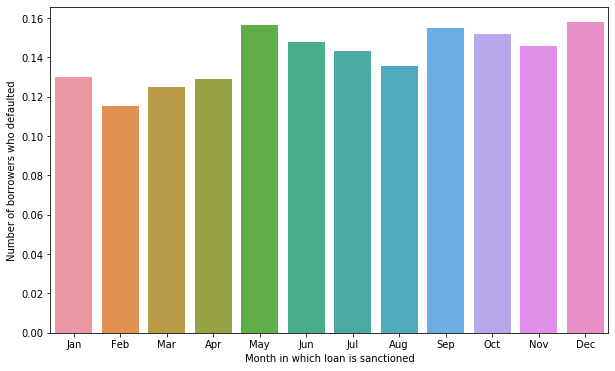

In [81]:
# against the month in which loan is issued to the borrower by LendingClub ('issue_month')
plt.figure(figsize=(10,6))
plot_cat('issue_month', 'Month in which loan is sanctioned', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

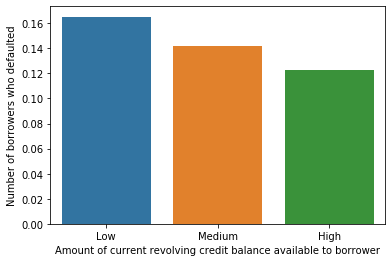

In [82]:
# against the current amount of revolving credit balance acquired/available to the borrower
plot_cat('avl_revol_credit_balance_bin', 'Amount of current revolving credit balance available to borrower', order=['Low', 'Medium', 'High'])

### Insights & take-aways from univariate analysis!

1. Once the loan amount requested for starts hovering in the 'High' (between 15,000 dollars & 25,000 dollars ) and 'Very High' ( > 25,000 dollars) territories, the tendency/probability to default increases. Further, the tendency to default is higher for 'Very High' value loans than 'High' value loans. 
2. Borrowers opting for 60 month loan repayment window are on average ~2.5X more likely to default than those opting for the 36 month repayment option.
3. Higher the interest rate charged by LendingClub, higher the instances of default. For 'High' (between 15% & 20%) and 'Very High' (>= 20 percent) interest rates, the tendency to default shows remarkable increase. Further on, borrowers being charged with 'Very High' interest rate demonstrate higher instances of default than those being charged in the 'High' domain. 
4. Higher the monthly installment being paid by the borrower, higher the probability that they might default. Though, the rise in the number of defaults observed isn't very steep here. 
5. Loans opted for the 'E', 'F' & 'G' grades are more likely to result in a default, with 'G' taking the top spot, followed by 'F' & 'E' in that order.
6. There is no observed/derivable correlation between length of employment & recorded repayment behaviour. 
7. Home owners with status reported as 'Other' are the worst defaulters. Not much difference in terms of repayment behaviour was observed between those living on rent versus those residing in their own accommodations. That being said, there is a subtly low chance of a home owner defaulting (when compared with those living on rent). 
8. Lower the income reported by the borrower, higher is the chance that they might default. 
9. Verification status present sort of an irony. Borrowers having their income verified from LendingClub show the likelihood of turning into a defaulter, more so when compared with borrowers having verification status as 'Source Verified' & 'Not Verified'. Furthermore, 'Not Verified' applicants are better at repayment than 'Source Verified' borrowers!
10. Borrowers with their interest of procuring loan lying in the 'Small Business' & 'Renewable Energy' domains are not ideal candidates to be given loan to. They are arguably the worst defaulters. 
11. Borrowers from the states of Nevada & Tennessee tend to default the highest (in that order).
12. Higher the calculated debt to income ratio, higher the chance that the borrower might default. 
13. Eight number of delinquencies in the past appear to be a marker for bad repayment behaviour, & giving out loans here should be avoided.
14. Number of credit inquiries done in the past 6 months do not masquerade as a very strong predictor for default tendency. 
15. 1 or more number of public derogatory records does not present a bright picture for the prospective borrower. They show higher tendency to default. 
16. Once the number of open credit lines cross 31, probability of default rapidly goes up. At ~38 number of open credit lines, everybody who gets a loan defaults!
17. Higher the instances of bankruptcies suffered by the borrower, higher goes the chance of them defaulting.
18. Borrowers borrowing in the months of May, September & December appear to default more! 
19. Lower the amount of revolving credit balance available to the borrower, higher is their tendency to default. 

## Segmented Univariate Analysis

In [83]:
# function to plot segmented univariate bar plots
def plot_segmented(cat_var, target_hue):
    plt.figure(figsize=(10,6))
    sns.barplot(x= cat_var, y='loan_status', hue=target_hue, data=loan, ci=None)
    plt.show()

### Trying to find a further correlation with purpose

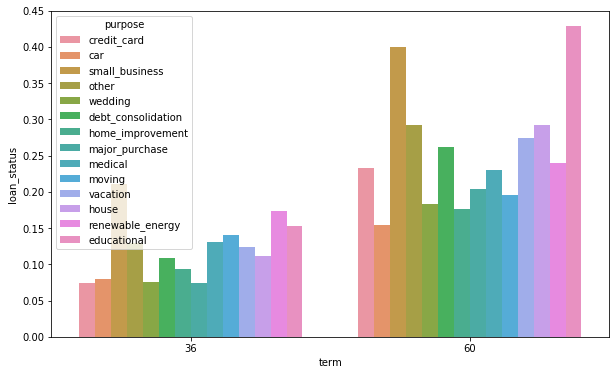

In [84]:
plot_segmented('term', 'purpose')

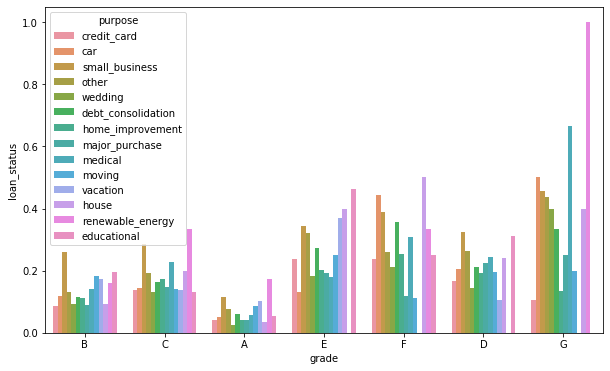

In [85]:
plot_segmented('grade', 'purpose')

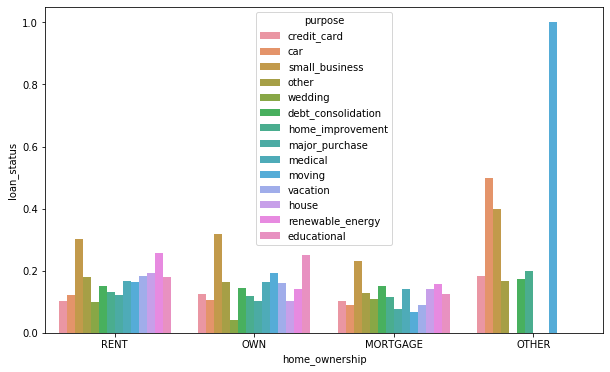

In [86]:
plot_segmented('home_ownership', 'purpose')

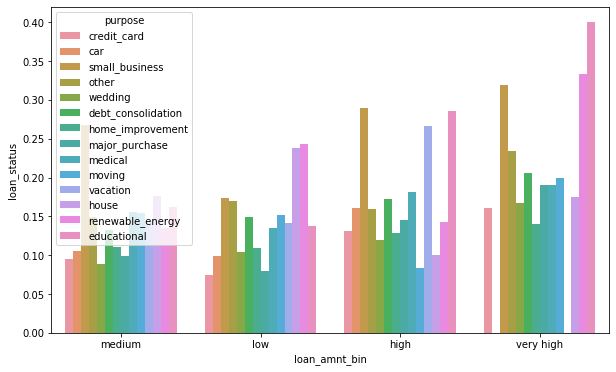

In [87]:
plot_segmented('loan_amnt_bin', 'purpose')

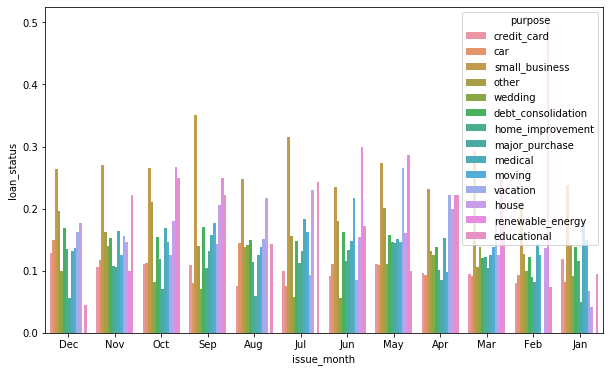

In [88]:
plot_segmented('issue_month', 'purpose')

Some interesting findings: <br>
1. Borrowers opting loans for small business take the top spot for defaulting in both 36 month & 60 month tenured loans. Renewable energy takes an argumentative second spot.
2. If a loan category is G & the purpose opted is 'Renewable Energy' there is almost sureshot chance of a default. Better to steer clear.
3. People who report their home ownership status as 'Other' & take out a loan for 'moving' purposes, are surely not the best candidates to loan out to. 
4. Across all loan amounts & months, small business & renewable energy persist on as the riskiest categories to loan out for. 

### Trying to find a further correlation with subgrade

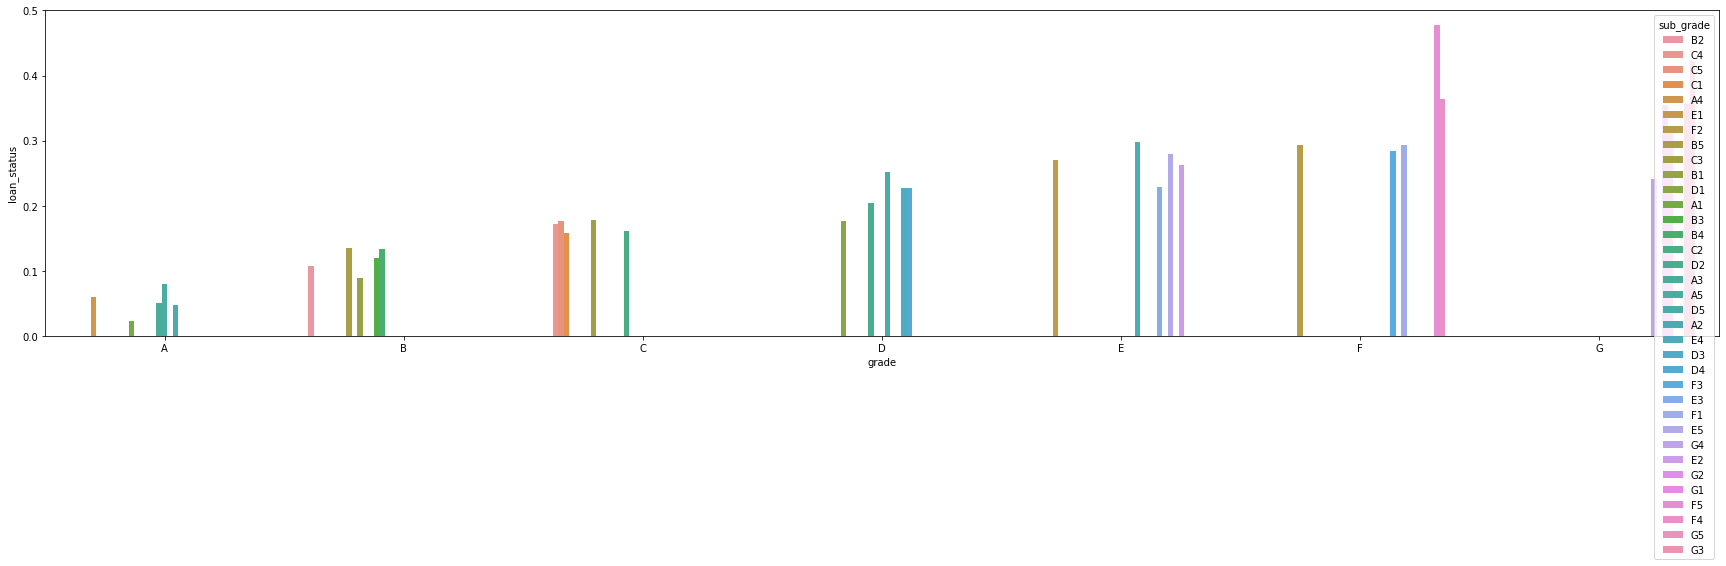

In [89]:
plt.figure(figsize=(30,6))
sns.barplot(x='grade', y='loan_status', hue='sub_grade', data=loan, ci=None, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Inferences for sub_grade behaviour manifested in loan grades: <br>
1. In grade A, A2 category loans are the riskiest to loan out for.
2. For loans categorized as grade B, B3 & B4 category loans take the top spot on the 'risk' board.
3. C grade categorized loans see the highest defaults in the C1 & C5 sub_grades.
4. For D, it's D2 & D5, E has E4, F suffers with F4/F5 as their worst performing sub_grades, in terms of loan repayment.
5. No decisive information is present for grade G. 


## Bivariate Analysis

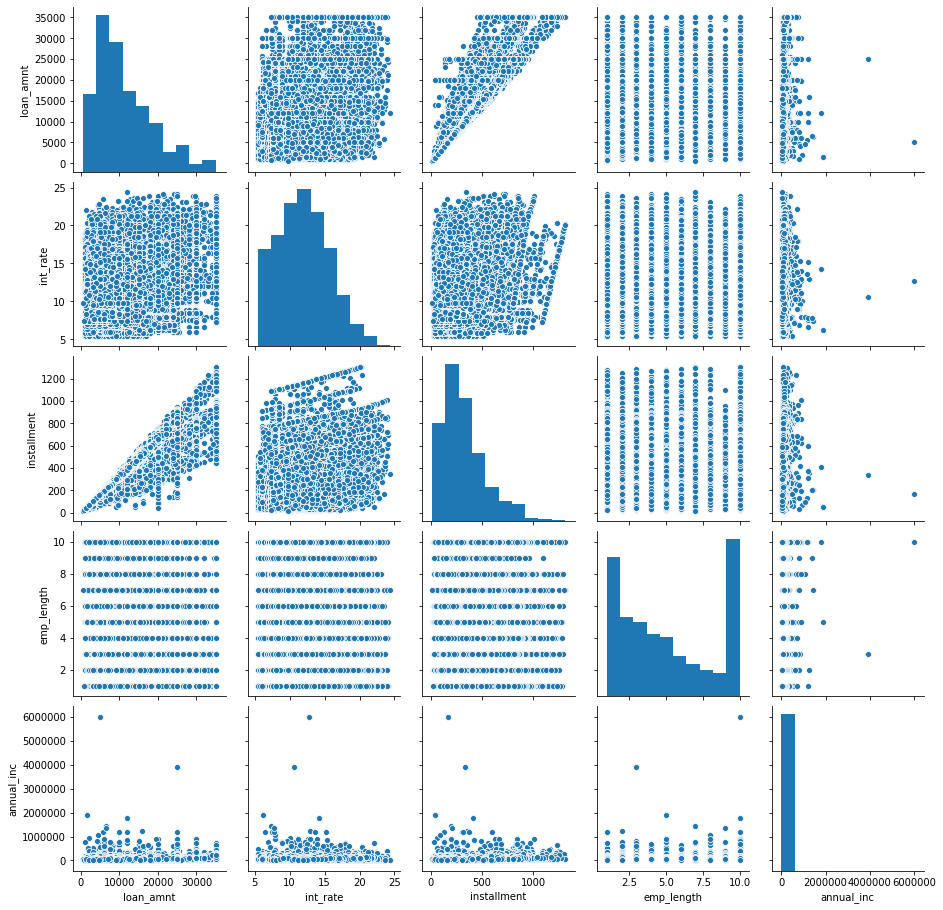

In [90]:
sns.pairplot(loan[['loan_amnt','int_rate', 'installment' ,'emp_length','annual_inc' ]])
plt.show()

In [91]:
corr = loan.corr()

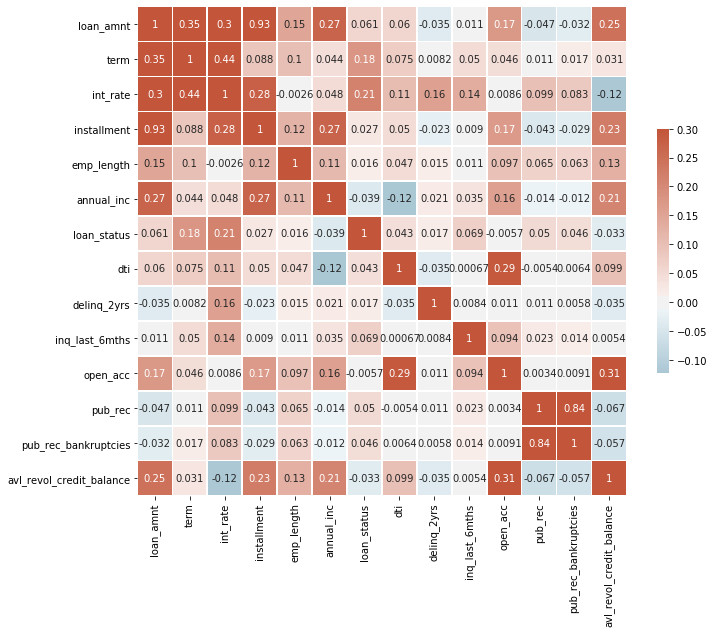

In [92]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()